In [3]:
import torch
import numpy as np

import os
import glob
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [4]:
input_file_path = '../data/PixelDetector/'
input_file_names = os.path.join(input_file_path, '*.npy')

Processing ../data/PixelDetector/cluster_epoch0.npy
Processing ../data/PixelDetector/cluster_epoch1.npy


(array([5.100e+01, 4.230e+02, 2.247e+03, 4.204e+03, 2.290e+03, 5.800e+02,
        1.510e+02, 3.800e+01, 1.200e+01, 4.000e+00]),
 array([ 4.,  9., 14., 19., 24., 29., 34., 39., 44., 49., 54.]),
 <BarContainer object of 10 artists>)

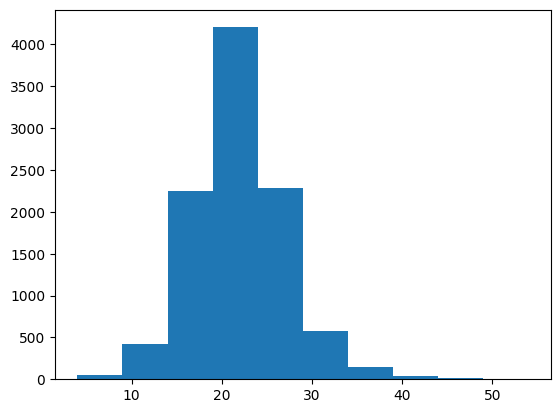

In [5]:
# Loop over the existing h5 files, reduce the dimension, and write to the output path
data_list = []
for input_file_name in glob.iglob(input_file_names):
    print('Processing {}'.format(input_file_name))
    data = torch.from_numpy(np.load(input_file_name))
    data_list.append(data)

data = np.concatenate(data_list)
data = data.transpose([0,2,3,1])
plt.hist(data.sum(axis=(1,2,3)))

0


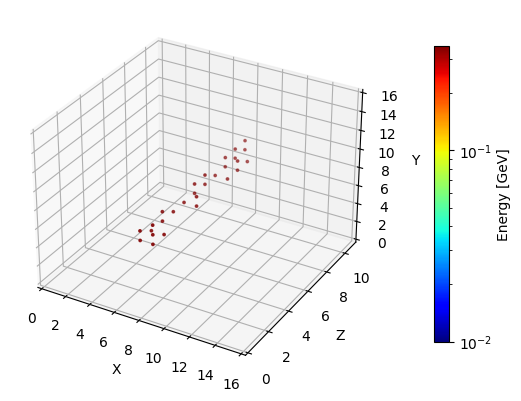

In [6]:
def show_image_3d(image):
    image = image.squeeze()
    image = image.transpose(0, 2, 1)
    index = np.indices(image.shape)
    value = image.flatten()

    size = value.copy()
    size[size < 1e-3] = 0
    size[size >= 1e-3] = 1
    
    # 3D Plot
    fig = plt.figure()
    ax3D = fig.add_subplot(projection='3d')

    color_map = plt.get_cmap('jet')

    print(value.min())
    scatter_plot = ax3D.scatter(index[0], index[1], index[2], 
                                s = size*3, c = value, 
                                cmap = color_map, norm=colors.LogNorm(0.01, 0.35) )                                                                          
    ax3D.set_xlabel('X')
    ax3D.set_ylabel('Z')
    ax3D.set_zlabel('Y')
    ax3D.set_xlim(0, image.shape[0])
    ax3D.set_ylim(0, image.shape[1])
    ax3D.set_zlim(0, image.shape[2])

    plt.colorbar(scatter_plot, shrink = 0.8, 
                 label = 'Energy [GeV]', anchor=(0.5, 0.5))
    plt.show()

example_data = data[8]
show_image_3d(example_data)

In [7]:
x_bins = [0, 6, 12, 18, 25, 30, 37, 44, 51]
y_bins = []
z_bins = [0, 3, 6, 9, 12, 15, 19, 22, 25]
example_data = reduce(example_data, x_bins, y_bins, z_bins)

NameError: name 'reduce' is not defined

In [ ]:
def show_image_2d(image):
    image = image.squeeze()
    index = np.indices(image.shape)
    
    # 3D Plot
    fig = plt.figure()
    ax3D = fig.add_subplot(projection='3d')

    color_map = plt.get_cmap('jet')

    scatter_plot = ax3D.plot_surface(index[0], index[1], image,
                                cmap = color_map)                                                                          
    ax3D.set_xlabel('X')
    ax3D.set_ylabel('Z')

    ax3D.set_xlim(0, image.shape[0]-1)
    ax3D.set_ylim(0, image.shape[1]-1)

    plt.colorbar(scatter_plot, shrink = 0.8, 
                 label = 'Energy [GeV]', anchor=(0, 0.5))
    plt.show()

show_image_2d(example_data)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(example_data.flatten())
ax.set_xlabel('X')
ax.set_ylabel('Energy [GeV]')

In [ ]:
example_data = example_data.sum(axis=1)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(example_data.flatten())
ax.set_xlabel('X')
ax.set_ylabel('Energy [GeV]')